<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Organizing-the-data" data-toc-modified-id="Organizing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Organizing the data</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Colors" data-toc-modified-id="Colors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Colors</a></span></li><li><span><a href="#Stacked-bar-plot" data-toc-modified-id="Stacked-bar-plot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Stacked bar plot</a></span></li><li><span><a href="#Pie-charts" data-toc-modified-id="Pie-charts-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Pie charts</a></span></li><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Bar plots</a></span></li></ul></li></ul></div>

## Dependencies

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
from matplotlib.patches import Patch

## Organizing the data

In [2]:
rawdf = pd.read_csv('../CSGO/bans.csv', encoding='latin1', index_col=0)
teams = ['Astralis', 'Natus Vincere', 'Liquid', 'mousesports', 'MIBR', 'FaZe', 'BIG', 'North', 'NiP', 'NRG', 'HellRaisers', 'compLexity']
maps = ['Cache', 'Nuke', 'Dust2', 'Train', 'Overpass', 'Inferno', 'Mirage']

In [3]:
grawdf = rawdf.groupby(['team', 'map']).size().reset_index(name='counts')
df = pd.DataFrame(columns=['team'])
df['team'] = teams
df.set_index('team', inplace=True)

for map in maps:
    tempdf = grawdf.query("map == @map")
    tempdf = tempdf[tempdf['team'].isin(teams)]
    tempdf.reset_index(drop=True, inplace=True)
    tempdf.set_index('team', inplace=True)
    df = df.join(tempdf['counts'])
    df.rename(index=str, columns={'counts': map}, inplace=True)
df.fillna(0, inplace=True)
df['Total']= df.sum(axis=1)

In [4]:
for mapname in maps:
    newcolumn = '%' + mapname
    df[newcolumn] = df.apply(lambda x: x[mapname]/x['Total'], axis=1)
plottableFrame = df[['%Cache', '%Nuke', '%Dust2', '%Train', '%Overpass', '%Inferno', '%Mirage']]
plottableFrame.rename(index = str, columns={'%Cache': 'Cache', '%Nuke': 'Nuke', '%Dust2': 'Dust2', '%Train': 'Train', '%Overpass': 'Overpass', '%Inferno': 'Inferno', '%Mirage': 'Mirage'}, inplace=True)

D:\Games\Anaconda\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


## Plots

### Colors

In [76]:
# Print een lijst met alle colormaps available
for name, item in cc.cm.items():
    print(name)

cyclic_grey_15_85_c0
cyclic_grey_15_85_c0_r
cyclic_grey_15_85_c0_s25
cyclic_grey_15_85_c0_s25_r
cyclic_mrybm_35_75_c68
cyclic_mrybm_35_75_c68_r
cyclic_mrybm_35_75_c68_s25
cyclic_mrybm_35_75_c68_s25_r
cyclic_mygbm_30_95_c78
cyclic_mygbm_30_95_c78_r
cyclic_mygbm_30_95_c78_s25
cyclic_mygbm_30_95_c78_s25_r
colorwheel
colorwheel_r
cyclic_wrwbw_40_90_c42
cyclic_wrwbw_40_90_c42_r
cyclic_wrwbw_40_90_c42_s25
cyclic_wrwbw_40_90_c42_s25_r
diverging_isoluminant_cjm_75_c23
diverging_isoluminant_cjm_75_c23_r
diverging_isoluminant_cjm_75_c24
diverging_isoluminant_cjm_75_c24_r
diverging_isoluminant_cjo_70_c25
diverging_isoluminant_cjo_70_c25_r
diverging_linear_bjr_30_55_c53
diverging_linear_bjr_30_55_c53_r
diverging_linear_bjy_30_90_c45
diverging_linear_bjy_30_90_c45_r
bjy
bjy_r
diverging_rainbow_bgymr_45_85_c67
diverging_rainbow_bgymr_45_85_c67_r
diverging_bkr_55_10_c35
diverging_bkr_55_10_c35_r
bkr
bkr_r
diverging_bky_60_10_c30
diverging_bky_60_10_c30_r
bky
bky_r
diverging_bwr_40_95_c42
diverging_bw

In [77]:
#My own colorlist, based on colors used by HLTV to identify the maps
#  maplist= ['Cache',    'Nuke',    'Dust2',   'Train',  'Overpass', 'Inferno', 'Mirage']
colorlist = ['#4CB5F5', '#D13525', '#EBDF00', '#3F681C', '#DE7A22', '#375E97', '#FAAF08']

#Pick n colors out of a list of colors
def getColorList(colormap, n):
    colorlist = []
    it = int(len(colormap)/n) 
    for i in range (0,n):
        colorlist.append(colormap[i*it])
    return colorlist

colorlistfire = getColorList(cc.fire, 7)
colorlistblind = getColorList(cc.palette["rainbow"], 7)

### Stacked bar plot

[<Container object of 12 artists>, <Container object of 12 artists>, <Container object of 12 artists>, <Container object of 12 artists>, <Container object of 12 artists>, <Container object of 12 artists>, <Container object of 12 artists>]


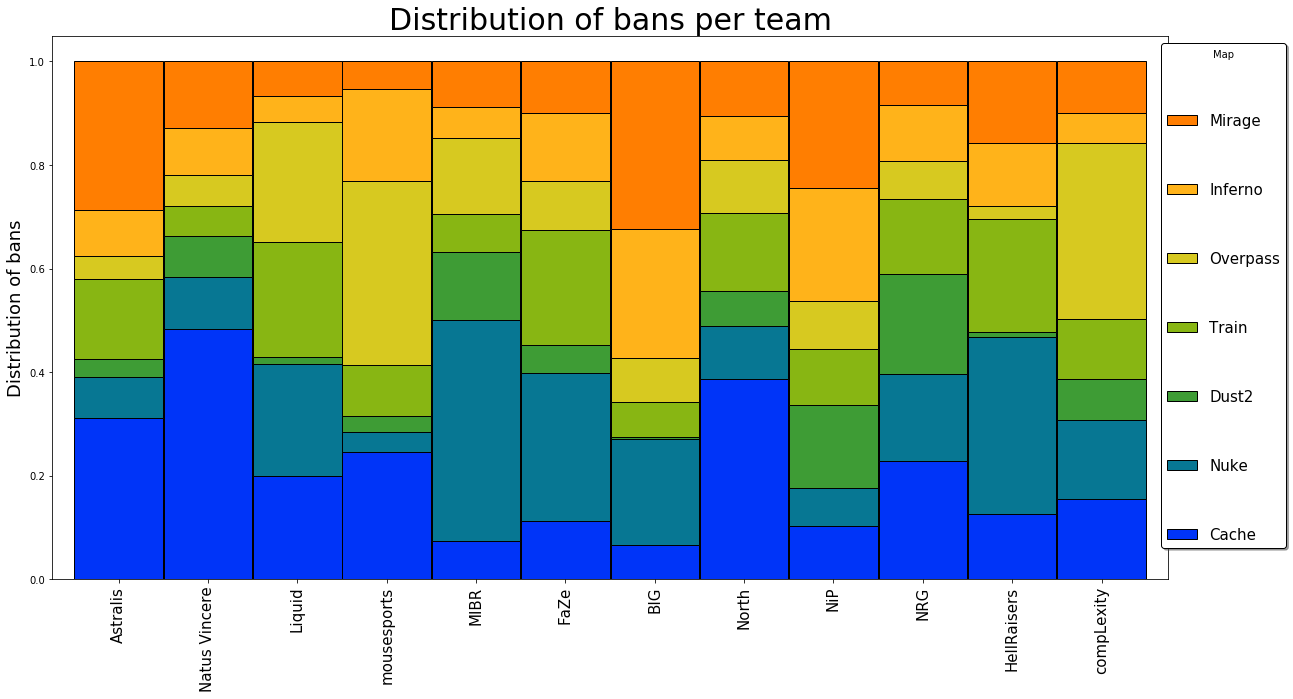

In [116]:
width = 0.5
ax = plottableFrame.plot.bar(width=0.99, stacked=True, color=colorlistblind, figsize=(20,10), edgecolor=['black']*len(teams))
#plt.xlabel("Team", size=18)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(15)
x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
plt.ylabel("Distribution of bans", size=18)
handles, labels = ax.get_legend_handles_labels()
#print(handles)
ax.legend(handles[::-1], labels[::-1], title='Map', labelspacing=3.6,
           loc='upper center', prop={'size': 15}, fancybox=True, shadow=True, bbox_to_anchor=(1.05, 1), edgecolor='black')
plt.title("Distribution of bans per team", size=30)
#plt.savefig('BansPerTeamStackedBarBlind.png', dpi=500)
plt.show()     

### Pie charts

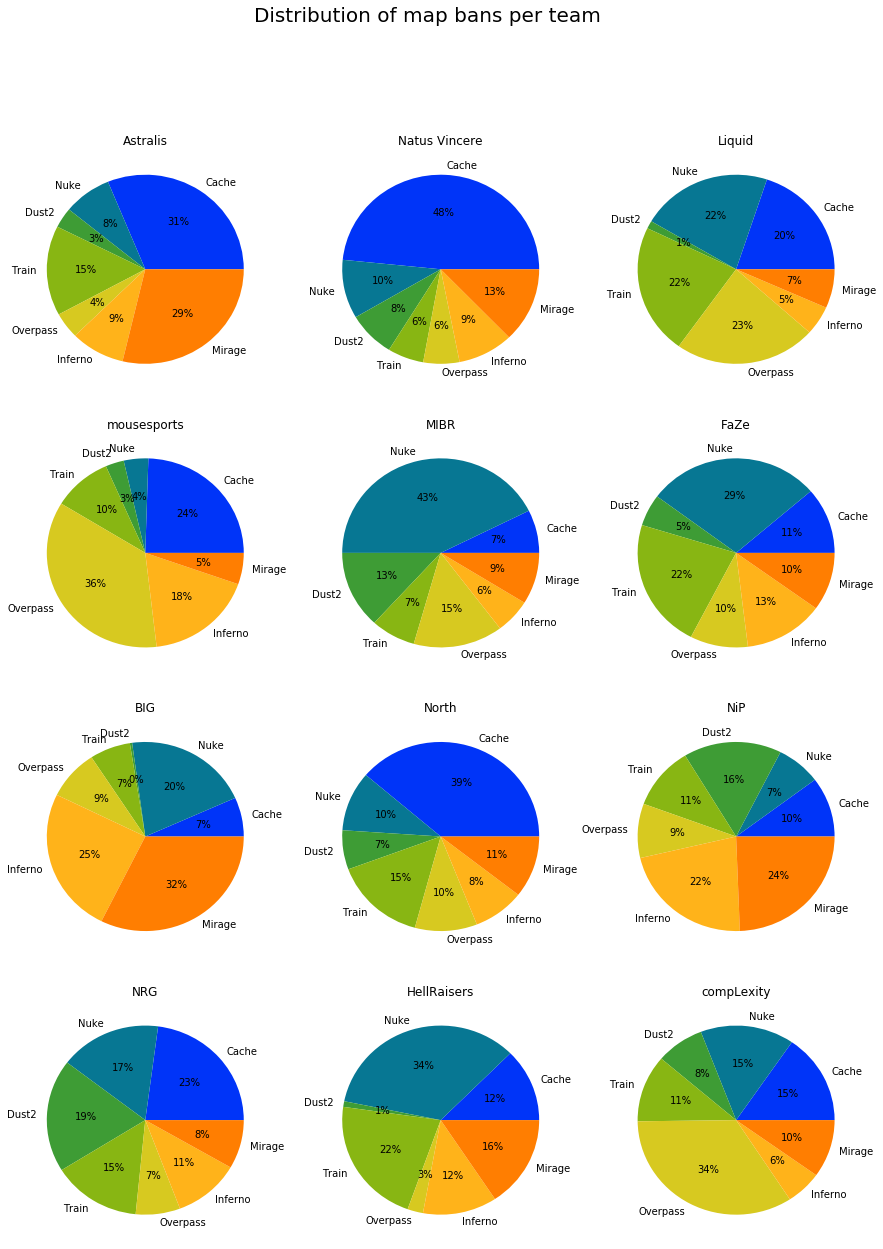

In [172]:
colorlistpie = colorlistblind
fig, ax = plt.subplots(4,3, figsize=(15,20))
i = 0
labels = ['Cache', 'Nuke', 'Dust2', 'Train', 'Overpass', 'Inferno', 'Mirage']
for team in teams:
    ax[int(i/3), i%3].pie(plottableFrame.loc[team], labels=labels, colors=colorlistpie, autopct='%1.0f%%')
    ax[int(i/3), i%3].set_title(team)
    i= i+1  
#Legend        (bbox_to_anchor coordinates are wrong for notebook, but produce the right png file, I have no idea why)
piehandles =[]
for color in colorlistpie:
    piehandles.append(Patch(facecolor=color, edgecolor='black'))
plt.figlegend(piehandles, labels, title='Legend', ncol=7,
           prop={'size': 10}, fancybox=True, shadow=True, edgecolor='black', bbox_to_anchor=(0.75, 0.95))
#Title
fig.suptitle("Distribution of map bans per team", size=20)
plt.savefig('BansPerTeamPieBlind.png', dpi=500)
plt.show()  

### Bar plots
I have no idea why the order of the maps is different in the plots.

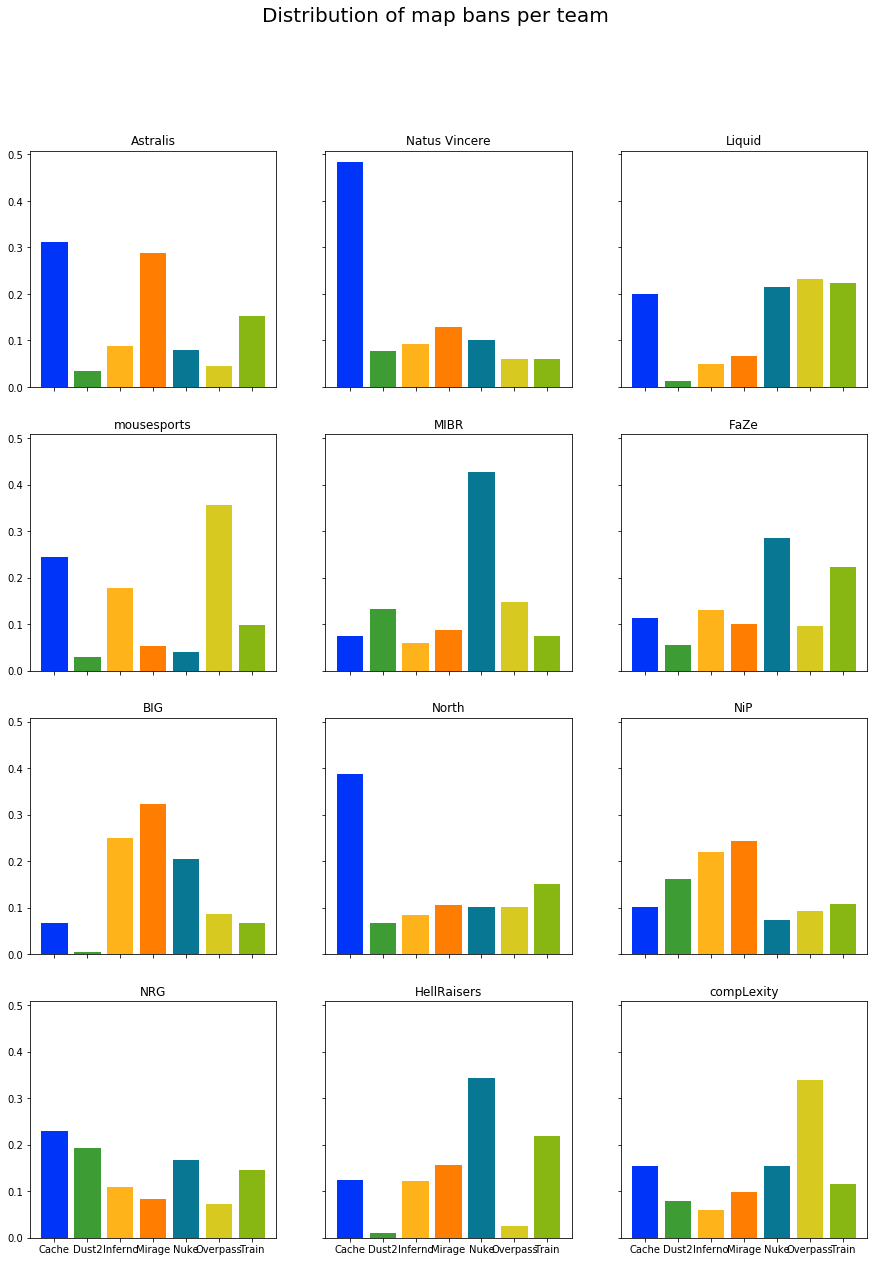

In [180]:
colorlistbarplot = colorlistblind
fig, ax = plt.subplots(4,3, figsize=(15,20), sharex=True, sharey=True)
i = 0
labels = ['Cache', 'Nuke', 'Dust2', 'Train', 'Overpass', 'Inferno', 'Mirage']
for team in teams:
    ax[int(i/3), i%3].bar(maps, plottableFrame.loc[team], color=colorlistbarplot)
    ax[int(i/3), i%3].set_title(team)
    i= i+1  
#print(handles)
barhandles = []
for color in colorlistbarplot:
    barhandles.append(Patch(facecolor=color, edgecolor='black'))
plt.figlegend(barhandles, labels, title='Legend', ncol=7, prop={'size': 10}, fancybox=True, shadow=True, edgecolor='black', bbox_to_anchor=(0.75, .95))
fig.suptitle("Distribution of map bans per team", size=20)
#plt.savefig('BansPerTeamBarBlind.png', dpi=500)
plt.show()  